In [ ]:
import pandas as pd
import ssl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [82]:
def makeDF(df1, type1, neighborhood1, df2, type2, neighborhood2, pop): 
    
    # df1 and df2 are dataframes
    # neighborhood1 and neighborhood2 are the 'neighborhood' column titles
    # type1 and type2 are the things measured in each database
    #pop is the population dataframe
    # index_increment is the optional for changing the index
    
    
    t1CountColumn = type1 + " Count"
    t2CountColumn = type2 + " Count"
    
    # Makes adjustments to df1
    a = df1[neighborhood1].value_counts()
    df_a = pd.DataFrame(a)
    df_a = df_a.rename(columns = {neighborhood1 : t1CountColumn})
    df_a  = df_a.reset_index().rename(columns = {"index" : "Neighborhood"})
        
    # Makes adjustments to df2
    b = df2[neighborhood2].value_counts()
    df_b = pd.DataFrame(b)
    df_b = df_b.rename(columns = {neighborhood2 : t2CountColumn})
    df_b  = df_b.reset_index().rename(columns = {"index" : "Neighborhood"})
    
    #Makes adjustmets to pop
    c = population_records[["Neighborhood", "Pop. 2010"]]
    c["Pop. 2010"] = c["Pop. 2010"].str.replace(',', '')
    c["Pop. 2010"] = c["Pop. 2010"].astype(int)
    
    #Merges df1, df2, pop
    temp = pd.merge(df_a, df_b)
    df_merge = pd.merge(temp,c)
    
    t1ScoreColumn = type1 + " Safety Score"
    t1RankColumn = type1 + " Safety Rank"
    
    df_merge[t1ScoreColumn] = (1 - df_merge[t1CountColumn]/df_merge["Pop. 2010"]) * 100
    df_merge = df_merge.sort_values(by = [t1ScoreColumn], ascending = False)
    df_merge = df_merge.reset_index(drop = True)
    df_merge.index = df_merge.index + 1 #Start index at 1 instead of 0
    df_merge[t1RankColumn] = df_merge.index
    dfa = df_merge.set_index(["Neighborhood"]).drop([t2CountColumn], axis = 1)
    
    t2ScoreColumn = type2 + " Safety Score"
    t2RankColumn = type2 + " Safety Rank"
    
    df_merge[t2ScoreColumn] = (1 - df_merge[t2CountColumn]/df_merge["Pop. 2010"]) * 100
    df_merge = df_merge.sort_values(by = [t2ScoreColumn], ascending = False)
    df_merge = df_merge.reset_index(drop = True)
    df_merge.index = df_merge.index + 1 #Start index at 1 instead of 0
    df_merge[t2RankColumn] = df_merge.index
    dfb = df_merge.set_index(["Neighborhood"]).drop([t1CountColumn, t1RankColumn, t1ScoreColumn], axis = 1)
    
    df_merge["Overall Safety Score"] = df_merge[[t1ScoreColumn, t2ScoreColumn]].mean(axis = 1)
    df_merge = df_merge.sort_values(by = ["Overall Safety Score"], ascending = False)
    df_merge = df_merge.reset_index(drop = True)
    df_merge.index = df_merge.index + 1 #Start index at 1 instead of 0
    df_merge["Overall Rank"] = df_merge.index
    
    df_merge = df_merge.set_index(["Neighborhood"])    
    
    return dfa, dfb, df_merge

In [83]:
arrest_records = pd.read_csv("arrest-data.csv")
fire_records = pd.read_csv("fire-incident-data.csv")
population_records = pd.read_csv("population-density.csv")

df_arrest, df_fire, df = makeDF(arrest_records, "Arrest", "INCIDENTNEIGHBORHOOD", fire_records, "Fire", "neighborhood", population_records)

display(df_arrest.head(10))
display(df_fire.head(10))
display(df.head(10))

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Arrest Count,Pop. 2010,Arrest Safety Score,Arrest Safety Rank
Neighborhood,,,,
Central Northside,23,2923,99.213137,1
Squirrel Hill North,151,11363,98.671126,2
Swisshelm Park,20,1361,98.530492,3
Regent Square,19,928,97.952586,4
North Oakland,223,10551,97.886456,5
New Homestead,22,990,97.777778,6
Stanton Heights,115,4601,97.500543,7
Ridgemont,13,483,97.308489,8
Squirrel Hill South,439,15110,97.094639,9


,Fire Count,Pop. 2010,Fire Safety Score,Fire Safety Rank
Neighborhood,,,,
Regent Square,6,928,99.353448,1
Westwood,21,3066,99.315068,2
Morningside,26,3346,99.222953,3
Swisshelm Park,11,1361,99.191771,4
Highland Park,54,6395,99.155590,5
Squirrel Hill North,96,11363,99.155153,6
North Oakland,92,10551,99.128045,7
Shadyside,125,13915,99.101689,8
Stanton Heights,43,4601,99.065421,9


,Arrest Count,Fire Count,Pop. 2010,Arrest Safety Score,Arrest Safety Rank,Fire Safety Score,Fire Safety Rank,Overall Safety Score,Overall Rank
Neighborhood,,,,,,,,,
Squirrel Hill North,151,96,11363,98.671126,2,99.155153,6,98.913139,1
Swisshelm Park,20,11,1361,98.530492,3,99.191771,4,98.861132,2
Regent Square,19,6,928,97.952586,4,99.353448,1,98.653017,3
North Oakland,223,92,10551,97.886456,5,99.128045,7,98.507250,4
Stanton Heights,115,43,4601,97.500543,7,99.065421,9,98.282982,5
Central Northside,23,94,2923,99.213137,1,96.784126,65,97.998632,6
Squirrel Hill South,439,178,15110,97.094639,9,98.821972,19,97.958306,7
Morningside,111,26,3346,96.682606,11,99.222953,3,97.952779,8
New Homestead,22,20,990,97.777778,6,97.979798,43,97.878788,9


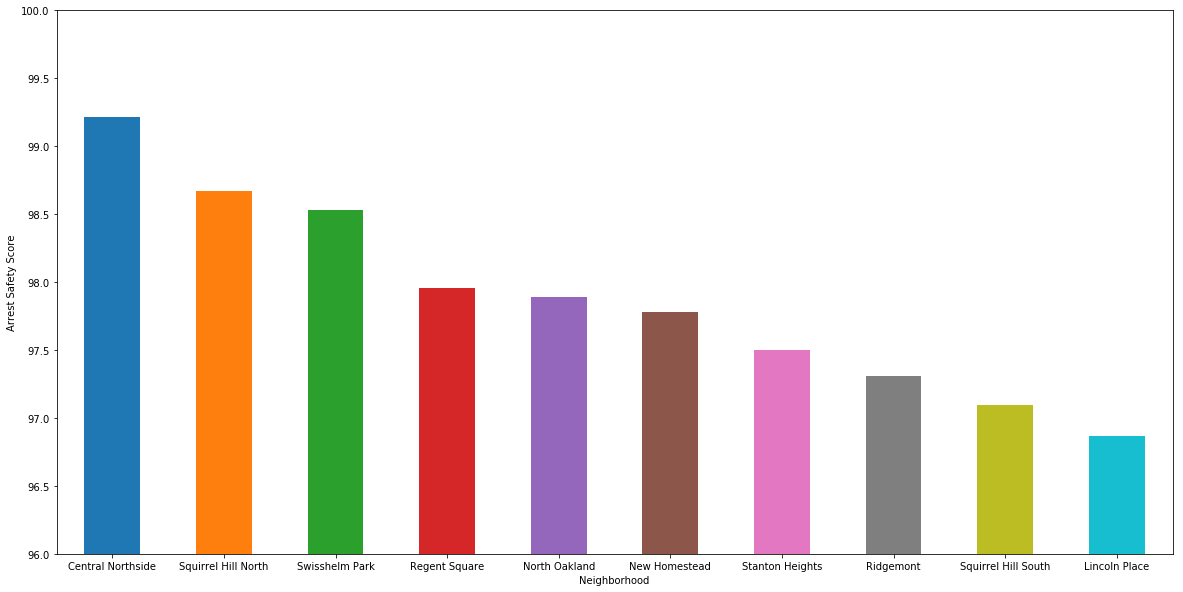

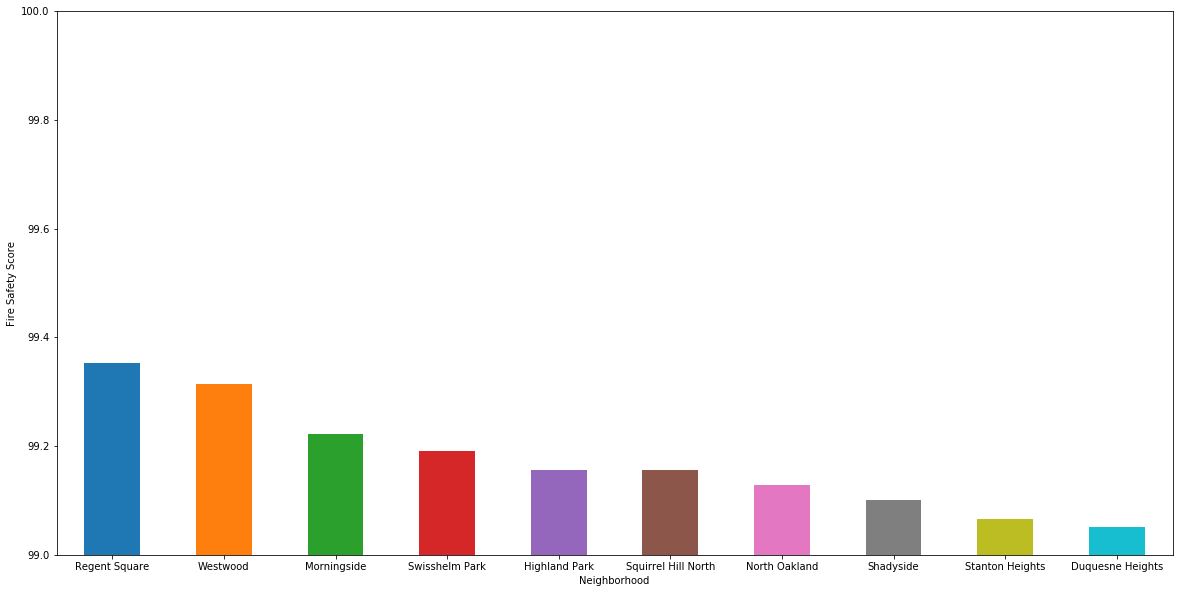

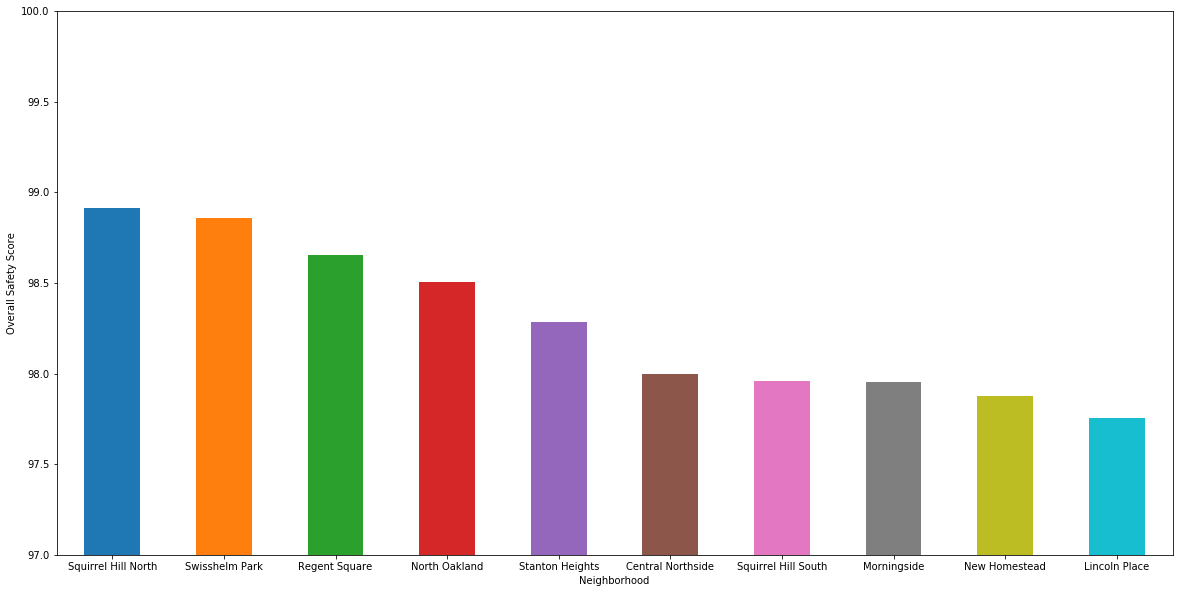

In [110]:
plt.figure(figsize = (20,10))
df_arrest["Arrest Safety Score"].head(10).plot(rot = 0, kind ='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Arrest Safety Score");
plt.ylim(96,100)
plt.show()

plt.figure(figsize = (20,10))
df_fire["Fire Safety Score"].head(10).plot(rot = 0, kind ='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Fire Safety Score");
plt.ylim(99,100)
plt.show()

plt.figure(figsize = (20,10))
df["Overall Safety Score"].head(10).plot(rot = 0, kind ='bar')
plt.xlabel("Neighborhood")
plt.ylabel("Overall Safety Score");
plt.ylim(97,100)
plt.show()

In [8]:
arrest_records["INCIDENTNEIGHBORHOOD"].value_counts()

Central Business District      2131
South Side Flats               1953
Carrick                        1313
East Allegheny                 1235
Homewood South                 1138
Homewood North                 1036
East Liberty                    995
Marshall-Shadeland              853
Mount Washington                838
Bluff                           783
Knoxville                       752
Hazelwood                       706
Lincoln-Lemington-Belmar        697
Brookline                       693
Beechview                       686
Sheraden                        660
Allegheny Center                651
Perry South                     637
Brighton Heights                612
East Hills                      580
Middle Hill                     569
Bloomfield                      551
Shadyside                       540
Allentown                       539
Fineview                        496
Central North Side              487
North Shore                     470
Crawford-Roberts            

In [9]:
fire_records["neighborhood"].value_counts()

Carrick                      220
Central Business District    186
South Side Flats             184
Hazelwood                    183
Squirrel Hill South          178
East Liberty                 148
Lincoln-Lemington-Belmar     146
Mount Washington             145
Homewood North               145
Sheraden                     134
Homewood South               128
Perry South                  128
Brookline                    127
Shadyside                    125
East Hills                   121
Bloomfield                   120
Knoxville                    116
Brighton Heights             105
Larimer                      102
Beechview                    101
Beltzhoover                   97
Marshall-Shadeland            97
Squirrel Hill North           96
Central Northside             94
North Oakland                 92
Allentown                     89
Bluff                         87
Perry North                   83
Greenfield                    82
Spring Hill-City View         80
          

In [17]:
df_arrest_records = pd.DataFrame(arrest_records)
df_arrest_records.sort_values(by=['INCIDENTNEIGHBORHOOD'])

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
4249,1979981,16232793,57.0,M,B,2017-01-18T15:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",3304 Criminal Mischief. / 3934 Theft from Vehicle,"100 Block South Commons Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.005189,40.451003
13848,1991956,17196028,30.0,M,B,2017-10-10T23:18:00,"200 Block East Ohio ST Pittsburgh, PA 15212",13(a)(31) Marijuana: Possession Small Amount,"200 Block East Ohio ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.003660,40.453022
13849,1991957,17196028,31.0,M,W,2017-10-10T23:18:00,"200 Block East Ohio ST Pittsburgh, PA 15212",4910 Tampering with or Fabricating Physical Ev...,"200 Block East Ohio ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.003660,40.453022
10126,1987279,17120858,24.0,M,B,2017-06-29T23:59:00,"200 Block East Ohio ST Pittsburgh, PA 15212",5101 Obstructing Admin. of Law / 601.12 Inter...,"200 Block East Ohio ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.003660,40.453022
10125,1987278,17120858,37.0,M,B,2017-06-29T23:59:00,"200 Block East Ohio ST Pittsburgh, PA 15212",13(a)(16) Possession of Controlled Substance /...,"200 Block East Ohio ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.003660,40.453022
27465,2009383,19006955,32.0,M,W,2019-01-11T15:29:00,"Cedar AV & Pressley ST Pittsburgh, PA 15212",13(a)(32) Paraphernalia - Use or Possession / ...,"Cedar AV & Pressley ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.001149,40.451625
8044,1984614,17076487,60.0,M,B,2017-04-27T20:29:00,"Cedar AV & Virgin WY Pittsburgh, PA 15212",13(a)(16) Possession of Controlled Substance /...,"Cedar AV & Virgin WY Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.001589,40.452985
18365,1997820,18044623,39.0,M,B,2018-03-09T16:08:00,"East Ohio ST & Cedar AV Pittsburgh, PA 15212",2706 Terroristic Threats. / 2709(a) Harassment...,"East Ohio ST & Cedar AV Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.001694,40.453312
8078,1984701,17079995,30.0,F,W,2017-05-02T19:32:00,"Cedar AV & East Ohio ST Pittsburgh, PA 15212",9501 Bench Warrant,"Cedar AV & East Ohio ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.001694,40.453312
799,1974887,16154150,29.0,M,B,2016-08-17T18:20:00,"Cedar AV & East Ohio ST Pittsburgh, PA 15212",13(a)(32) Paraphernalia - Use or Possession,"Cedar AV & East Ohio ST Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.001694,40.453312


In [19]:
df_fire_records = pd.DataFrame(fire_records)
df_fire_records.sort_values(by=['neighborhood'])

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3139,F150080414,131.0,Passenger vehicle fire,"E OHIO ST & CEDAR AVE, PITTSBURGH PA 15222",2015-10-11T21:41:28,0,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453312,-80.001694
2674,F140040942,113.0,"Cooking fire, confined to container","00 BLOCK N COMMONS ST, PITTSBURGH PA 15212",2014-06-09T18:09:52,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453877,-80.006175
825,F150055797,151.0,"Outside rubbish, trash or waste fire","SANDUSKY ST & STOCKTON ST, PITTSBURGH PA 15219",2015-07-18T15:18:25,0,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-20,40.450483,-80.002883
1492,F160057139,160.0,"Special outside fire, Other","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2016-07-23T20:49:34,0,231EN03,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
1464,F170054638,151.0,"Outside rubbish, trash or waste fire","SANDUSKY ST & E NORTH AVE, PITTSBURGH PA 15212",2017-07-04T21:12:53,0,231EN37,2206.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.455843,-80.004565
2730,F140045633,113.0,"Cooking fire, confined to container","00 BLOCK N COMMONS ST, PITTSBURGH PA 15237",2014-06-26T20:18:12,1,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453877,-80.006175
4151,F130057965,154.0,Dumpster or other outside trash receptacle fire,"200 BLOCK E OHIO ST, PITTSBURGH PA 15212",2013-08-12T01:38:50,0,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
1423,F160053582,160.0,"Special outside fire, Other","ALLEGHENY SQ E & E COMMONS, PITTSBURGH PA 15212",2016-07-12T12:22:57,0,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453434,-80.003840
5060,F140085060,140.0,"Natural vegetation fire, Other","00 BLOCK MONTGOMERY PL, PITTSBURGH PA 15212",2014-11-25T18:06:33,0,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.454852,-80.006372
4217,F130064014,140.0,"Natural vegetation fire, Other","300 BLOCK ALLEGHENY AVE, PITTSBURGH PA 15209",2013-09-04T17:03:54,0,231EN37,2108.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.452792,-80.007050
